In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isna().any().sum()

0

In [8]:
df[['Amount', 'Class', 'Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [22]:
# Percentage of genuine transaction

count = 0
genuine = df['Class']
for i in range(len(genuine)):
    if genuine[i]==0:
        count = count+1
        
print(count)
percentage = (count/len(genuine))*100
print('percentage of total not fraud transaction in the dataset: ', percentage)

284315
percentage of total not fraud transaction in the dataset:  99.82725143693798


In [17]:
cn = 0
fraud = df['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        cn = cn+1
print('total fraud transaction is: ', cn)        
per = (cn/len(fraud))*100
print('percentage of total fraud transaction in the dataset: ', per)

total fraud transaction is:  492
percentage of total fraud transaction in the dataset:  0.1727485630620034


<AxesSubplot:xlabel='Class', ylabel='count'>

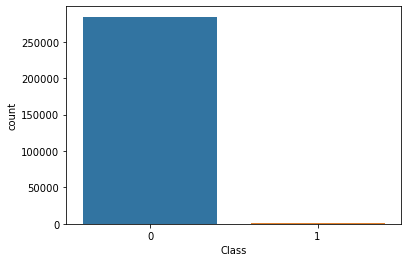

In [21]:
sns.countplot(x= 'Class', data=df)

Text(0, 0.5, 'Time')

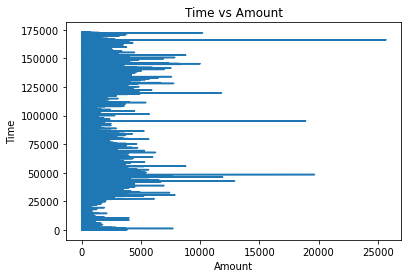

In [26]:
plt.plot(df['Amount'], df['Time'])
plt.title('Time vs Amount')
plt.xlabel('Amount')
plt.ylabel('Time')

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

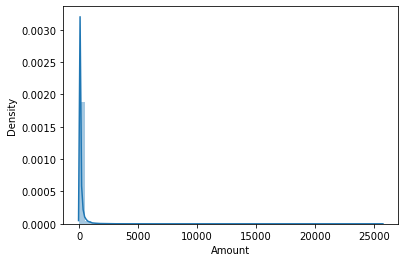

In [29]:
sns.distplot(df['Amount'])

<AxesSubplot:xlabel='Amount', ylabel='Time'>

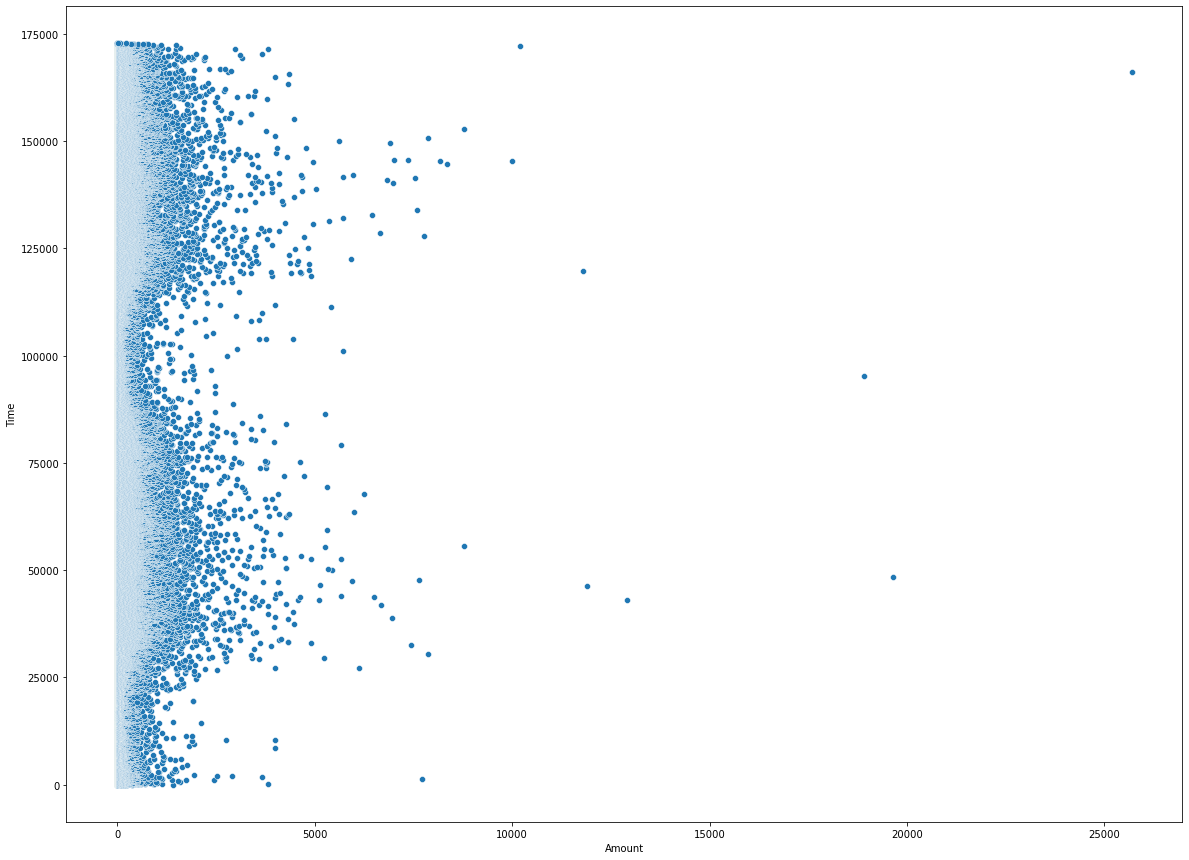

In [31]:
plt.figure(figsize=(20,15))
sns.scatterplot(x = 'Amount', y='Time', data=df)

<AxesSubplot:>

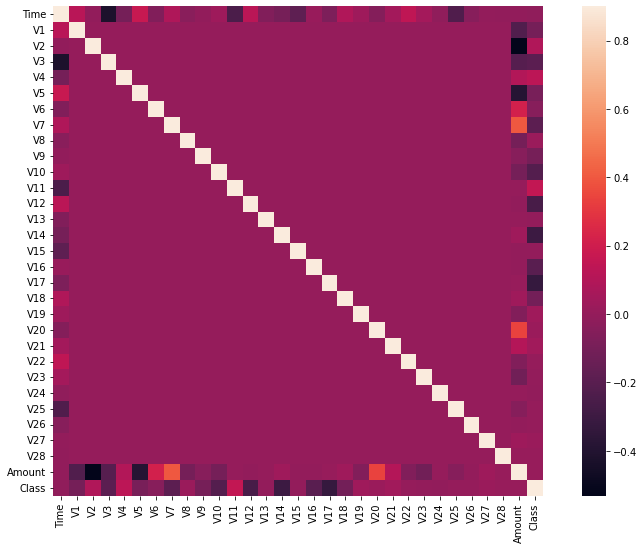

In [34]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, vmax=0.9, square=True)


In [35]:
x= df.drop(['Class'], axis =1)
y = df['Class']

In [37]:
x.shape

(284807, 30)

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=45)

In [48]:
model = LogisticRegression(max_iter=1000)

In [49]:
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [50]:
ypred = model.predict(xtest)

In [51]:
model.score(xtest,ytest)

0.9990871107053826

In [52]:
cn= confusion_matrix(ytest, ypred)


<AxesSubplot:>

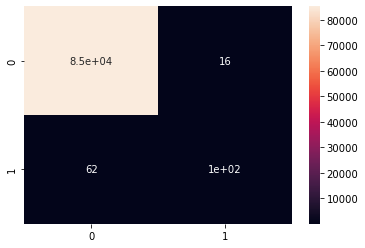

In [53]:
sns.heatmap(cn, annot=True)